# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [77]:
import pandas as pd
from ydata_profiling import ProfileReport

In [78]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [80]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [81]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [82]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

## Data Inspection

In [83]:
df.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

         flight_day  wants_extra_baggage  wants_preferred_seat  \
count  50000.000000         50000.000000          50000.000000   
mean       3.814420             0.668780              0.296960   
std        1.992792             0.470657              0.456923   
min        1.000000             0.000000              0.000000   
25%        2.000000             0.000000              0.000000   
50%        4.000000             1.000000              0.000000   
75%        5.000000             1.000000              1.000000   
max        7.000000             1.000000              1.000000   

       wants_in_flight_meals  flight_duration  booking_complete  
count           50000.000000     50000.000000      50000.000000  
mean                0.427140         7.277561          0.149560  
std                 0.494668         1.496863          0.356643  
min                 0.000000         4.670000          0.000000  
25%                 0.000000         5.620000          0.000000  
50%                 0.000000         7.570000          0.000000  
75%                 1.000000         8.830000          0.000000  
max                 1.000000         9.500000          1.000000

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [84]:
df

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[50000 rows x 14 columns]

In [85]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 719


In [86]:
# View duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)

# Remove duplicate rows
df_clean = df.drop_duplicates()

# Verify that duplicates are removed
duplicate_count_after = df_clean.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after}")

Duplicate rows:
       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
196                 5      Internet  RoundTrip            206              17   
316                 5      Internet  RoundTrip            206              17   
384                 5      Internet  RoundTrip            206              17   
456                 1      Internet  RoundTrip             30              85   
513                 3      Internet  RoundTrip            109              20   
...               ...           ...        ...            ...             ...   
49852               2      Internet  RoundTrip            204               6   
49902               1        Mobile  RoundTrip            106               6   
49934               1      Internet  RoundTrip              2               6   
49944               1      Internet  RoundTrip              2               6   
49961               1      Internet  RoundTrip             30               6   

       flig

- Duplicates removed

In [87]:
# check for missing values
df_clean.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

- No `missing` values

In [12]:
# Generate the profile report
profile = ProfileReport(df_clean, title='5G-Energy consumption')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
df_clean.groupby('booking_complete')['sales_channel'].value_counts()

booking_complete  sales_channel
0                 Internet         37115
                  Mobile            4775
1                 Internet          6802
                  Mobile             589
Name: count, dtype: int64

In [89]:
# Columns to check for outliers
columns_to_check = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each specified column
for column in columns_to_check:
    outliers = detect_outliers_iqr(df_clean, column)
    print(f"Outliers in {column}:")
    print(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}\n")

Outliers in num_passengers:
       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
12                  4      Internet  RoundTrip            265              24   
37                  6      Internet  RoundTrip             20              22   
61                  4      Internet  RoundTrip            128              21   
63                  4      Internet  RoundTrip            311              27   
118                 6      Internet  RoundTrip            172              28   
...               ...           ...        ...            ...             ...   
49953               8      Internet  RoundTrip            328               6   
49958               4        Mobile  RoundTrip            108               6   
49960               5      Internet  RoundTrip            102               6   
49976               4      Internet  RoundTrip            151               6   
49980               4      Internet  RoundTrip            242               6   


In [90]:
# Check the number of zeros
flight_hour_zeros = (df_clean['flight_hour'] == 0).sum()

In [91]:
flight_hour_zeros

1501

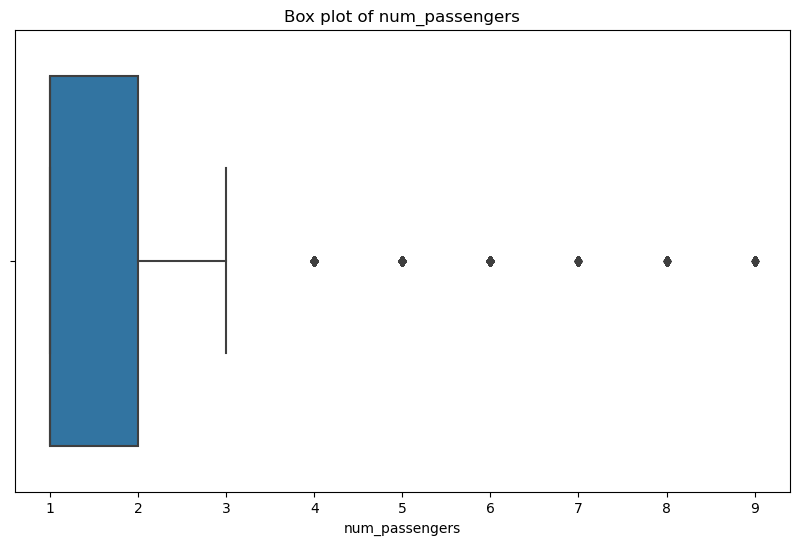

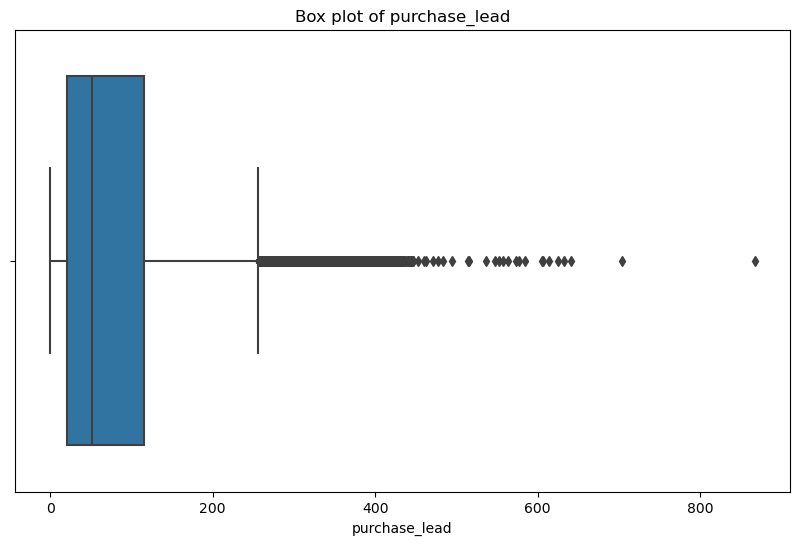

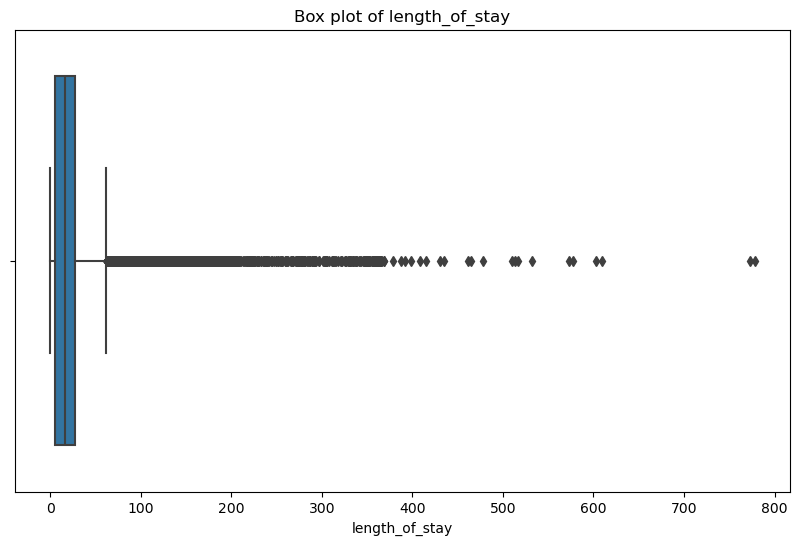

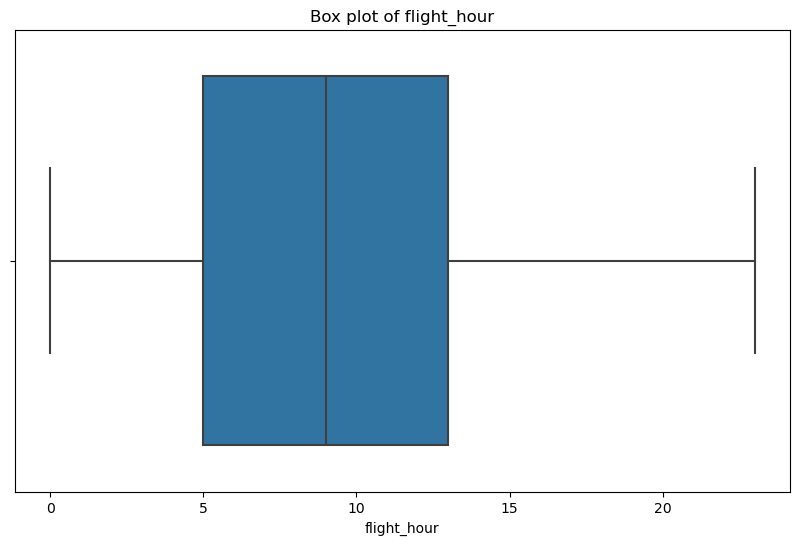

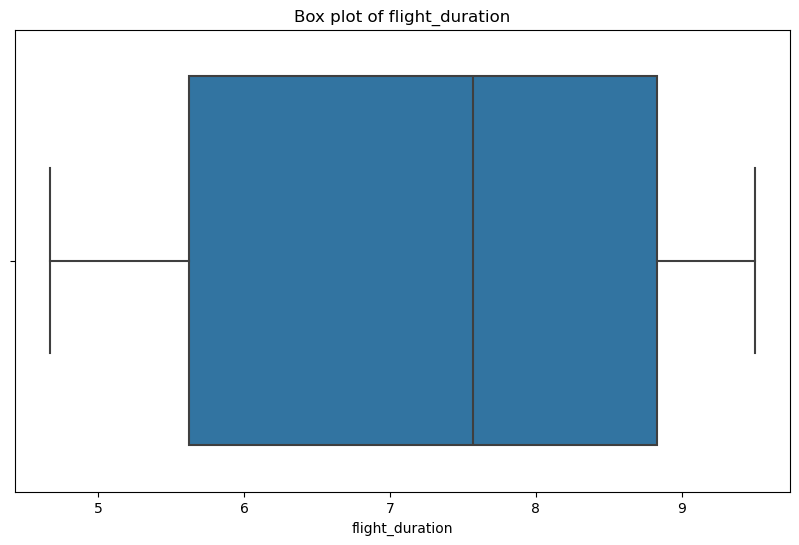

In [92]:
# Box-plot to view outliers
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize outliers
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_clean[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [93]:
df_clean[df_clean.length_of_stay > 700]

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
10821               1      Internet  RoundTrip            102             778   
22081               2      Internet  RoundTrip             11             773   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
10821            8           3  DPSMEL      Australia                    0   
22081           16           6  OOLTPE         Taiwan                    1   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
10821                     0                      0             8.83   
22081                     0                      1             8.83   

       booking_complete  
10821                 1  
22081                 0

In [94]:
df_clean[df_clean.purchase_lead > 800]

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
48259               3      Internet  RoundTrip            867               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
48259            7           1  KIXMLE          Japan                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
48259                     0                      1              7.0   

       booking_complete  
48259                 1

- There are outliers in the `length_of_stay` column and `purchase_lead` column, but they won't be handled because they aren't data entry errors and models like `RFC` and `RG-Boost` will be said as they are robust to outliers

In [95]:
df_clean

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49995            9           6  PERPNH      Australia                    1   
49996            4           7  PERPNH      Australia                    0   
49997           22           6  PERPNH      Australia                    0   
49998           11           1  PERPNH      Australia                    1   
49999           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[49281 rows x 14 columns]

In [96]:
data = df_clean.copy()

## Encode categorical variables

In [97]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ["sales_channel", "trip_type", "route", "booking_origin"]

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Display the updated DataFrame
data.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2              0          2            262              19   
1               1              0          2            112              20   
2               2              0          2            243              22   
3               1              0          2             96              31   
4               2              0          2             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0            7           6      0              61                    1   
1            3           6      0              61                    0   
2           17           3      0              36                    1   
3            4           6      0              61                    0   
4           15           3      0              36                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [98]:
data.booking_origin.value_counts()

booking_origin
4     17691
51     7055
85     4502
43     3819
17     3284
      ...  
67        1
95        1
92        1
13        1
88        1
Name: count, Length: 104, dtype: int64

# Mutual Information

In [99]:
X= data.drop('booking_complete',axis=1)
y= data.booking_complete         

In [100]:
X.dtypes

num_passengers             int64
sales_channel              int32
trip_type                  int32
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int32
booking_origin             int32
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [101]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.055164
booking_origin           0.047703
flight_duration          0.017188
wants_extra_baggage      0.011742
length_of_stay           0.010962
trip_type                0.008675
purchase_lead            0.003235
flight_day               0.003084
wants_preferred_seat     0.002858
num_passengers           0.002591
flight_hour              0.001349
wants_in_flight_meals    0.001129
sales_channel            0.000000
Name: MI Scores, dtype: float64

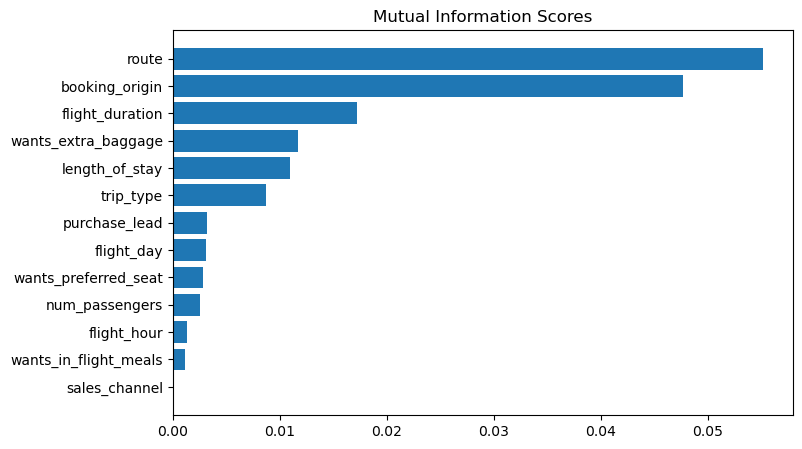

In [102]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)



- route
- booking_origin
- flight_duration
- wants_extra_baggage
- length_of_stay

are the top 5 features which are dependant with booking_complete feature

# Scaling of Data
Data scaling is a pre-processing step in machine learning that is used to standardize the range of independent variables or features of a dataset. It is important because many machine learning models assume that all features are on the same scale. If the features are not on the same scale, certain models may be biased towards features with larger values.

There are many methods for scaling data in Python, including:

1. Min-max scaling: This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the `MinMaxScaler` class from the `sklearn.preprocessing` module.

2. Standardization: This method scales the data to have a mean of 0 and a standard deviation of 1. It can be implemented using the `StandardScaler` class from the `sklearn.preprocessing` module.

3. Robust scaling: This method scales the data based on the median and interquartile range, making it more robust to outliers. It can be implemented using the `RobustScaler` class from the `sklearn.preprocessing` module.

4. Normalization: This method scales each data point to have a length of 1, which can be useful for certain distance-based algorithms. It can be implemented using the `Normalizer` class from the `sklearn.preprocessing` module.

These methods can be applied to both numerical and categorical features, depending on the specific use case.

In [103]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [104]:
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

In [105]:
y.value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

# Balancing Dataset

## Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)

`SMOTE` is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).

In [106]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Verify the new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_resampled.value_counts())


Before SMOTE:
 booking_complete
0    33511
1     5913
Name: count, dtype: int64
After SMOTE:
 booking_complete
0    33511
1    33511
Name: count, dtype: int64


## Model Training
Import the necessary libraries for each algorithms
create an instance of each model
fit the models to the training data using the fit method

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, fbeta_score, recall_score, precision_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [108]:
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [109]:
# Create predictions
y_pred = lr_model.predict(X_test_scaled)

# Calculate accuracy score for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score rounded to three decimal places
print(f'The accuracy of the logistic regression is {round(accuracy * 100, 3)}%')


The accuracy of the logistic regression is 61.56%


In [110]:
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.6156031246829664,
 'Precision': 0.22572988369333016,
 'Recall': 0.6434370771312584,
 'F1-Score': 0.3342119135477069}

## Decision Tree

In [111]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_resampled, y_train_resampled)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [112]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.764532819316222,
 'Precision': 0.2700490998363339,
 'Recall': 0.3349120433017591,
 'F1-Score': 0.29900332225913623}

## Random Forest

In [113]:
forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train_resampled, y_train_resampled)
forest_probs = forest_model.predict_proba(X_test_scaled)[:, 1]
preds= forest_model.predict(X_test_scaled)

forest_result = metrics_calculator(y_test, preds, 'forest_model')
forest_result

{'Model': 'forest_model',
 'Accuracy': 0.8336207771127118,
 'Precision': 0.3953488372093023,
 'Recall': 0.2070365358592693,
 'F1-Score': 0.27175843694493784}

## XG-BOOST

In [114]:
xgb_model = XGBClassifier()


xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]
preds= xgb_model.predict(X_test_scaled)

xgb_result = metrics_calculator(y_test, preds, 'xgb_model')
xgb_result

{'Model': 'xgb_model',
 'Accuracy': 0.8452876128639546,
 'Precision': 0.44835164835164837,
 'Recall': 0.13802435723951287,
 'F1-Score': 0.21107087428867047}

In [115]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, forest_result, xgb_result])

results_df

Model  Accuracy  Precision    Recall  F1-Score
0      lr_model  0.615603   0.225730  0.643437  0.334212
1      dt_model  0.764533   0.270049  0.334912  0.299003
2  forest_model  0.833621   0.395349  0.207037  0.271758
3     xgb_model  0.845288   0.448352  0.138024  0.211071

## AUC-ROC
The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [116]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate the AUC-ROC for RFC
forest_auc = roc_auc_score(y_test, forest_probs)

# Calculate the AUC-ROC for XGB
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'Random Forest AUC-ROC: {forest_auc:.2f}')
print(f'XGB-Boost AUC-ROC: {xgb_auc:.2f}')

Logistic Regression AUC-ROC: 0.66
Decision Tree AUC-ROC: 0.59
Random Forest AUC-ROC: 0.75
XGB-Boost AUC-ROC: 0.77


-  `XG - BOOST` perfors better overall

## Feature Importance

In [59]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

booking_origin: 0.20
length_of_stay: 0.15
flight_duration: 0.12
route: 0.12
purchase_lead: 0.11
flight_hour: 0.10
flight_day: 0.09
num_passengers: 0.05
wants_in_flight_meals: 0.02
wants_extra_baggage: 0.02
wants_preferred_seat: 0.02
sales_channel: 0.01
trip_type: 0.00


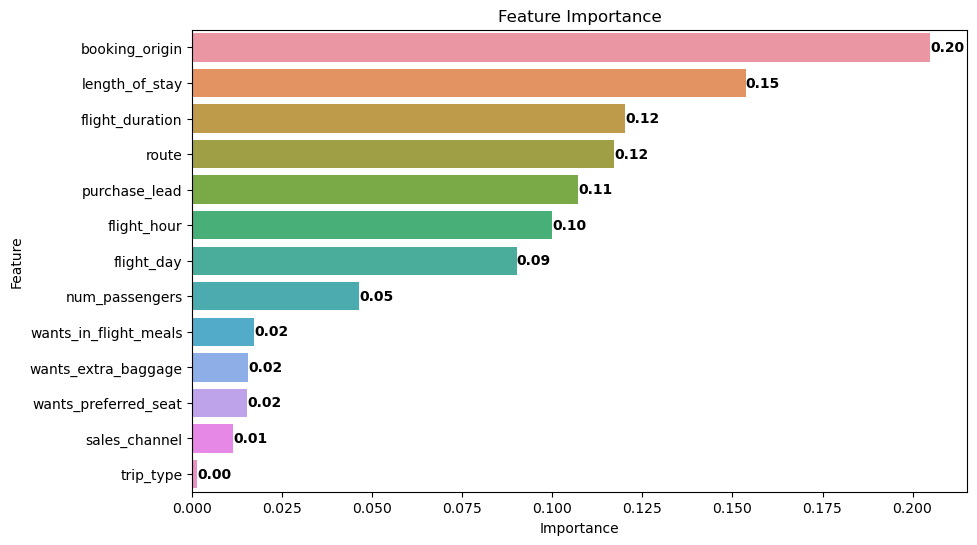

In [60]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

## Features Selection of Top six Features

In [64]:
# Assume the original DataFrame and the columns after encoding
columns = ["purchase_lead", "length_of_stay", "flight_hour", "flight_day", "route", "booking_origin", "flight_duration","num_passengers","sales_channel", "trip_type", "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"]

# Split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train, columns=columns)
X_valid_df = pd.DataFrame(X_valid, columns=columns)

# Select specific columns
selected_columns = ["purchase_lead", "length_of_stay", "flight_hour", "flight_day", "route", "booking_origin", "flight_duration"]
X_train2 = X_train_df[selected_columns]
X_valid2 = X_valid_df[selected_columns]


In [69]:
# Since XGB-Boost model is the best performing model

# fit the model on the new training set
xgb_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = xgb_model.predict(X_valid2)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.91
Precision Score: 0.82
Recall Score: 1.00
F1-score: 0.90


In [73]:
xgb_probs = xgb_model.predict_proba(X_valid2)[:, 1]

In [76]:
# Calculate the AUC-ROC for XGB
xgb_auc = roc_auc_score(y_valid, xgb_probs)
xgb_auc 

0.9300498394939982